## Load Packages

In [1]:
import os
import tensorflow as tf


import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools
import tensorflow_hub as hub

# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'


# Set default fonts for matplotlib
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}

mpl.rc('font', **font)

## Load Pre-Trained Model

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Utility Functions

In [3]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [4]:
def load_img(path_to_img,
            max_dim = 512):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [5]:
def remove_batch(img):
    if len(img.shape) > 3:
        img = tf.squeeze(img,axis=0)
    return img

In [6]:
def plot_images(content_image,
                style_image,
                result_image):
    content_image = remove_batch(content_image)
    style_image = remove_batch(style_image)
    result_image = remove_batch(result_image)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("Neural Style Transfer", fontsize=16)
    

    axes[0].imshow(content_image)
    axes[0].axis('off')  # Turn off axis
    axes[0].set_title('Content Image')


    axes[1].imshow(style_image)
    axes[1].axis('off')  
    axes[1].set_title('Style Image')

  
    axes[2].imshow(result_image)
    axes[2].axis('off')  
    axes[2].set_title('Result')
    plt.tight_layout()
    plt.show()

In [7]:
def stylize(content_image_path,
            style_image_path,
            model):
    content_image = load_img(content_image_path)
    
    style_image = load_img(style_image_path)
    result_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    plot_images(content_image, style_image, result_image)

## Example Usage With Different Styles

### Text Based Style Transfer

Here the style of the desired output is inferred directly from text based art only. 

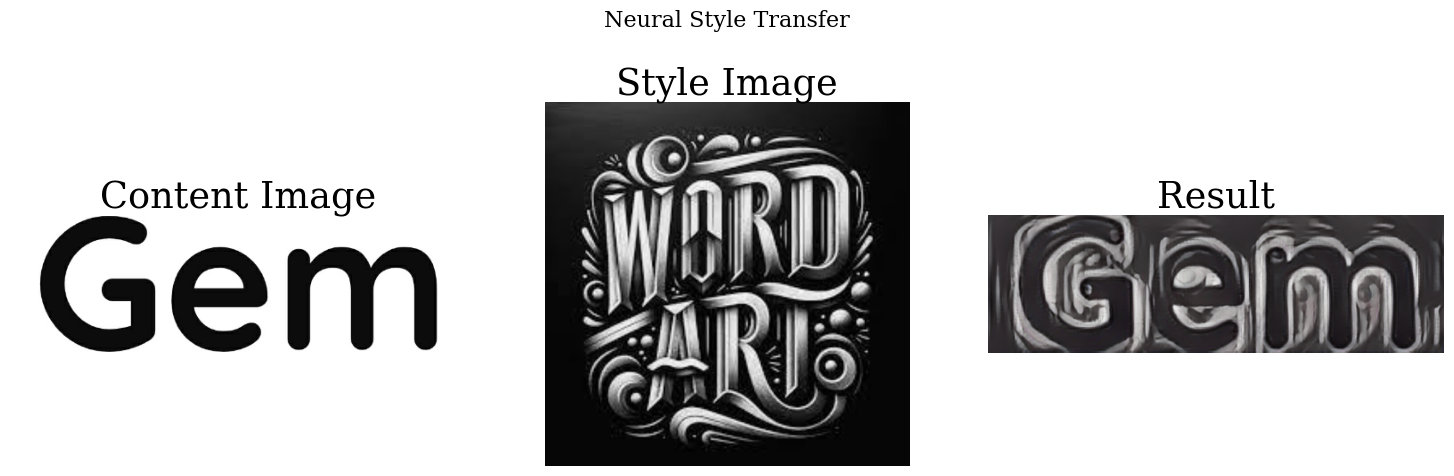

In [8]:
stylize("data/content_1.jpg", 
        "data/cool_style.jpg",
        model = model)

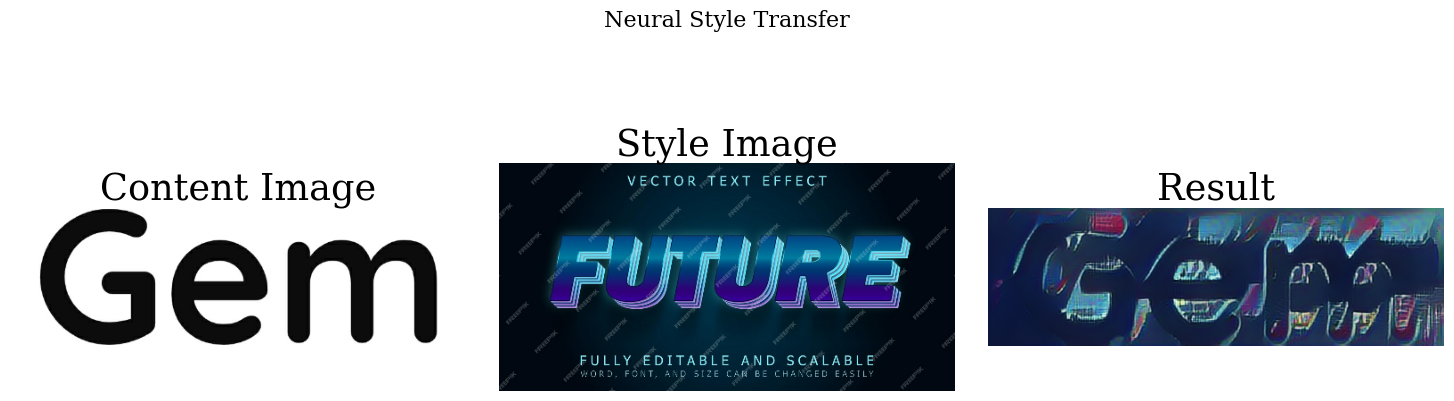

In [9]:
stylize("data/content_1.jpg", 
        "data/future_style.jpg",
        model = model)

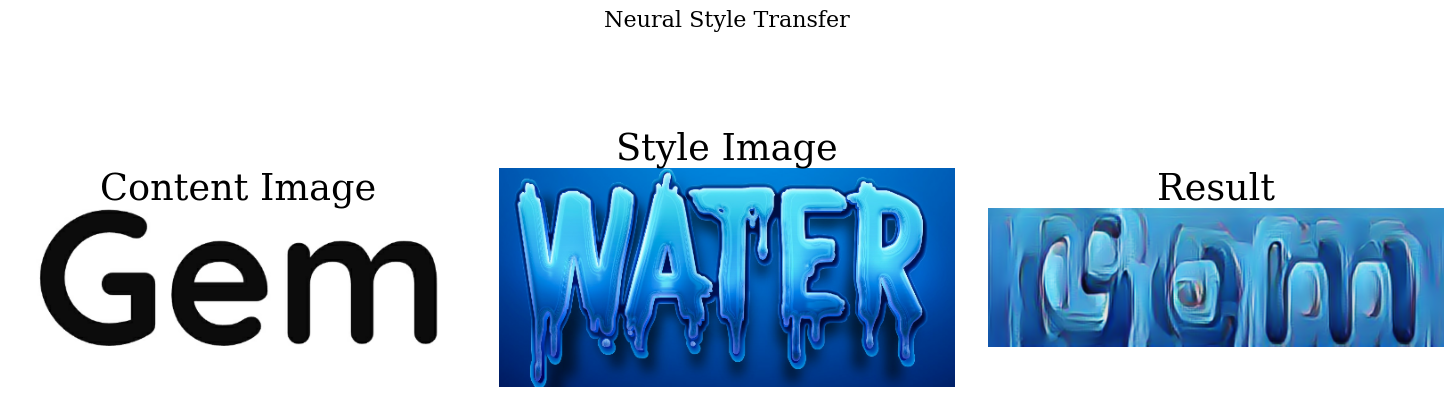

In [10]:
stylize("data/content_1.jpg", 
        "data/water_style.jpg",
        model = model)

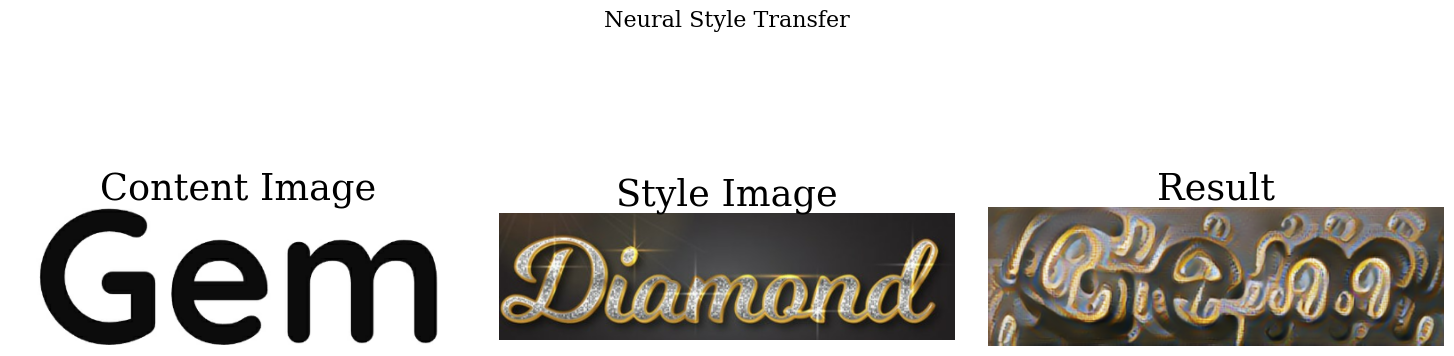

In [11]:
stylize("data/content_1.jpg", 
        "data/diamond.jpg",
        model = model)

### Image Based Style Transfer

Here we use a famous painting or some other theme image as an input for style transfer. 

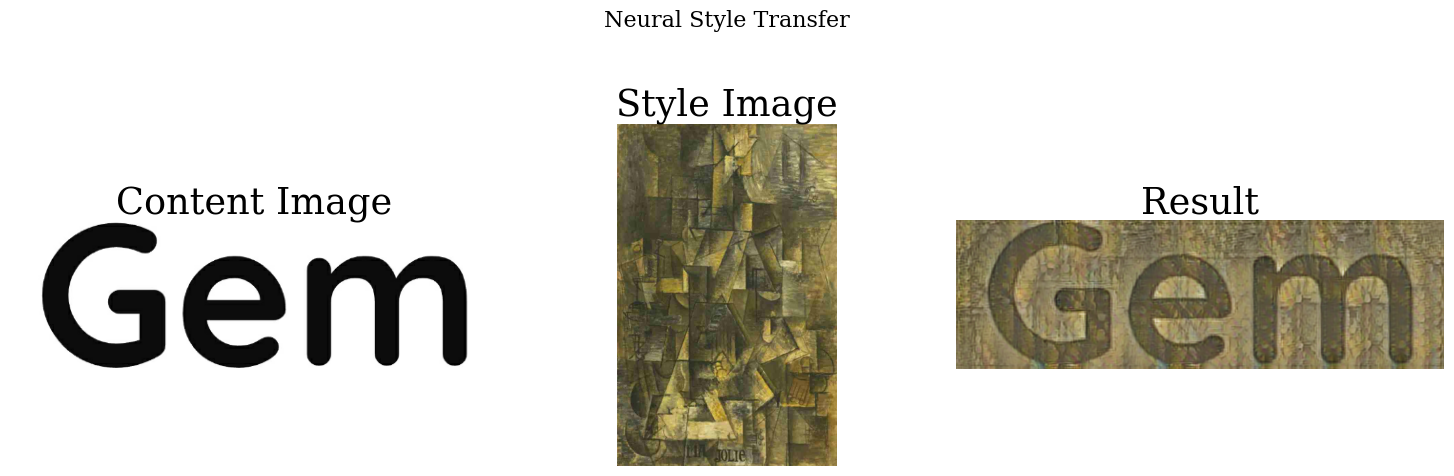

In [12]:
stylize("data/content_1.jpg", 
        "data/pica.jpeg",
        model = model)

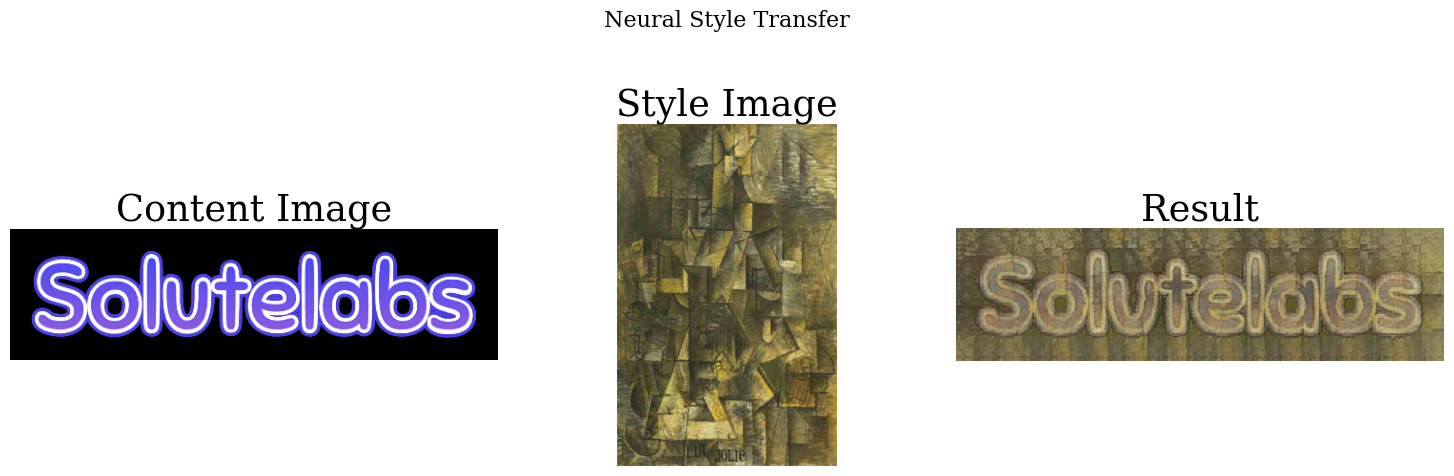

In [13]:
stylize("data/solute_labs_content.jpg", 
        "data/pica.jpeg",
        model = model)

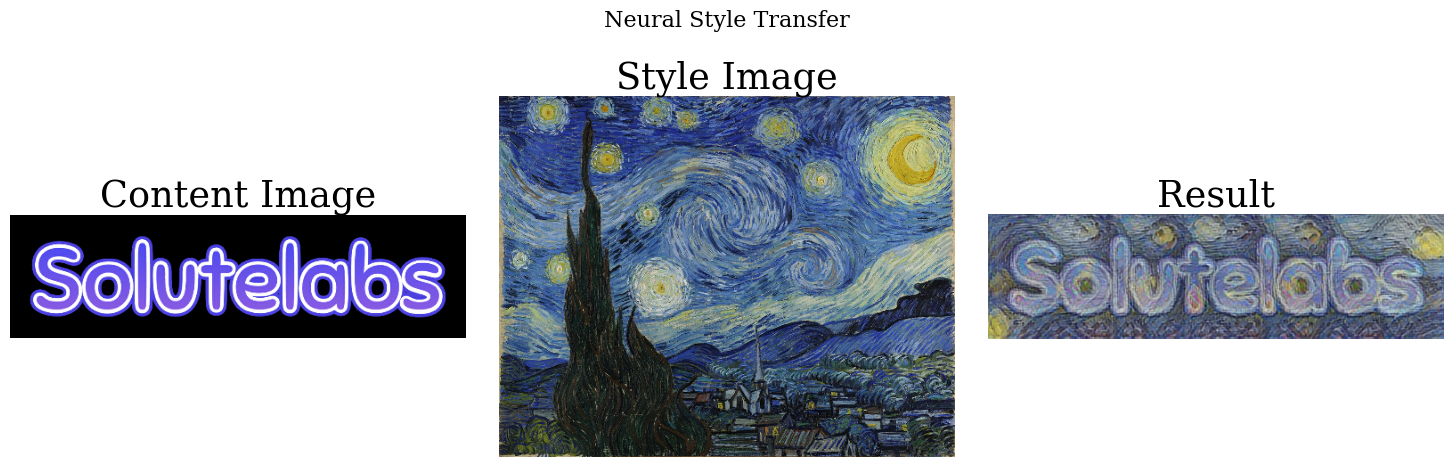

In [14]:
stylize("data/solute_labs_content.jpg", 
        "data/van_gogh.jpg",
        model = model)

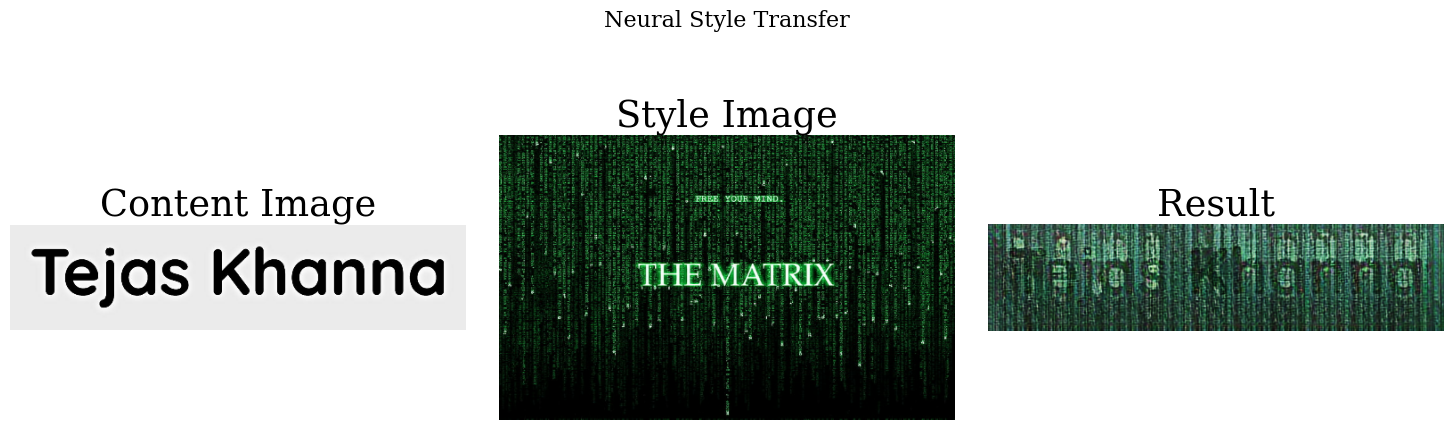

In [15]:
stylize("data/content_tejas.jpg", 
        "data/matrix_style.jpg",
        model = model)

### Notes
1. For better results, we will have to fine-tune a neural style tranfer model just for text-based style transfer.
2. This is a pre-trained model, so the results are only as good as the training data that was used for the same.
3. The pre-trained model here was trained with artistic images rather than text based word-art which is why the outputs for artisitc themes is much better than text-bases styles.